# Yellow Cab Exploratory Analysis

This is an exploratory analysis of Yellow Cab Data in Chicago Area with a simple linear regression model at the end of the analysis.

## 1. Load the relevant packages

In [1]:
import pandas as pd 
import numpy as np 

# Import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt

# Import seaborn and set the style
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

# The bokeh and set it up to output plots
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

# Get some other useful bokeh features
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

Loading BokehJS ...

## 2. Load and Look at the Data

Load the data:

In [2]:
df = pd.read_csv('Yellow Cab_Data.csv')
df.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,pickup_community_area,taxi_id,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,76.0,8306af2714046e8ea866381275be974a667d87beff6e7a...,4.35,0.0,2014-06-24T08:15:00.000,0f6d97fa5263afe0c7a4ea81af91d3bdba8cca39,0.0,0.0,2014-06-24T08:15:00.000,33.35
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,32.0,eb8d8e2b07b3c47702ecf64550405e8731f48fb0e274db...,0.00,0.0,2013-10-09T22:30:00.000,0f6d9803ed1092b9502fbc27b6bf4416d51d1584,1.2,300.0,2013-10-09T22:30:00.000,6.85
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,6.0,18cc8f12635a8251621a44661119a9d3c551d47b75a30d...,2.00,0.0,2013-05-18T22:45:00.000,0f6d9863f51d9bcfbde34650d5bf03da707b8c30,2.2,360.0,2013-05-18T22:30:00.000,9.25
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,28.0,4ab9f0cdee3df3c394efba906bbde7a4a577bcf8d1ce43...,0.00,0.0,2015-09-14T10:30:00.000,0f6d98a5e3058b341c580d52f10e8b67e8a2886b,1.4,780.0,2015-09-14T10:15:00.000,8.45
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,24.0,0f7439de8fef7b3ef247bb39388ced311561970baab1d6...,0.00,0.0,2015-10-24T11:30:00.000,0f6d98a6a24a38b4dcf0d476836459e298969ac6,2.2,420.0,2015-10-24T11:30:00.000,7.25


In [3]:
# There's a total of 2 million rows and 23 columns in the data
df.shape

(2000000, 23)

In [4]:
df.columns

Index(['company', 'dropoff_census_tract', 'dropoff_centroid_latitude',
       'dropoff_centroid_location', 'dropoff_centroid_longitude',
       'dropoff_community_area', 'extras', 'fare', 'payment_type',
       'pickup_census_tract', 'pickup_centroid_latitude',
       'pickup_centroid_location', 'pickup_centroid_longitude',
       'pickup_community_area', 'taxi_id', 'tips', 'tolls',
       'trip_end_timestamp', 'trip_id', 'trip_miles', 'trip_seconds',
       'trip_start_timestamp', 'trip_total'],
      dtype='object')

In [5]:
# Get the percentage of null value in each column
def get_percentage_missing(series):
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 5)
df_with_any_null_values = df[df.columns[df.isnull().any()].tolist()]
get_percentage_missing(df_with_any_null_values)

company                       0.35093
dropoff_census_tract          0.28586
dropoff_centroid_latitude     0.02878
dropoff_centroid_location     0.02878
dropoff_centroid_longitude    0.02878
dropoff_community_area        0.03065
extras                        0.00001
fare                          0.00001
pickup_census_tract           0.27768
pickup_centroid_latitude      0.00691
pickup_centroid_location      0.00691
pickup_centroid_longitude     0.00691
pickup_community_area         0.00693
taxi_id                       0.00006
tips                          0.00001
tolls                         0.00001
trip_end_timestamp            0.00014
trip_miles                    0.00000
trip_seconds                  0.00022
trip_total                    0.00001
dtype: float64

In [6]:
# To check how "trip_total" column is calculated
df['trip_total'] == df['fare'] + df['extras'] + df['tolls'] + df['tips']

0          True
1          True
2          True
3          True
4          True
           ... 
1999995    True
1999996    True
1999997    True
1999998    True
1999999    True
Length: 2000000, dtype: bool

## 3. Clean the Data

In [7]:
# Delete trips with null mileage and seconds values
df = df.dropna(subset=['trip_miles', 'trip_seconds']).copy()
df.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,pickup_community_area,taxi_id,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,76.0,8306af2714046e8ea866381275be974a667d87beff6e7a...,4.35,0.0,2014-06-24T08:15:00.000,0f6d97fa5263afe0c7a4ea81af91d3bdba8cca39,0.0,0.0,2014-06-24T08:15:00.000,33.35
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,32.0,eb8d8e2b07b3c47702ecf64550405e8731f48fb0e274db...,0.00,0.0,2013-10-09T22:30:00.000,0f6d9803ed1092b9502fbc27b6bf4416d51d1584,1.2,300.0,2013-10-09T22:30:00.000,6.85
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,6.0,18cc8f12635a8251621a44661119a9d3c551d47b75a30d...,2.00,0.0,2013-05-18T22:45:00.000,0f6d9863f51d9bcfbde34650d5bf03da707b8c30,2.2,360.0,2013-05-18T22:30:00.000,9.25
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,28.0,4ab9f0cdee3df3c394efba906bbde7a4a577bcf8d1ce43...,0.00,0.0,2015-09-14T10:30:00.000,0f6d98a5e3058b341c580d52f10e8b67e8a2886b,1.4,780.0,2015-09-14T10:15:00.000,8.45
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,24.0,0f7439de8fef7b3ef247bb39388ced311561970baab1d6...,0.00,0.0,2015-10-24T11:30:00.000,0f6d98a6a24a38b4dcf0d476836459e298969ac6,2.2,420.0,2015-10-24T11:30:00.000,7.25


In [8]:
# Delete trips with null cost and $0 cost
df = df.dropna(subset=['trip_total']).copy()
df = df.loc[df['trip_total'] != 0]
df.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,pickup_community_area,taxi_id,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,76.0,8306af2714046e8ea866381275be974a667d87beff6e7a...,4.35,0.0,2014-06-24T08:15:00.000,0f6d97fa5263afe0c7a4ea81af91d3bdba8cca39,0.0,0.0,2014-06-24T08:15:00.000,33.35
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,32.0,eb8d8e2b07b3c47702ecf64550405e8731f48fb0e274db...,0.00,0.0,2013-10-09T22:30:00.000,0f6d9803ed1092b9502fbc27b6bf4416d51d1584,1.2,300.0,2013-10-09T22:30:00.000,6.85
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,6.0,18cc8f12635a8251621a44661119a9d3c551d47b75a30d...,2.00,0.0,2013-05-18T22:45:00.000,0f6d9863f51d9bcfbde34650d5bf03da707b8c30,2.2,360.0,2013-05-18T22:30:00.000,9.25
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,28.0,4ab9f0cdee3df3c394efba906bbde7a4a577bcf8d1ce43...,0.00,0.0,2015-09-14T10:30:00.000,0f6d98a5e3058b341c580d52f10e8b67e8a2886b,1.4,780.0,2015-09-14T10:15:00.000,8.45
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,24.0,0f7439de8fef7b3ef247bb39388ced311561970baab1d6...,0.00,0.0,2015-10-24T11:30:00.000,0f6d98a6a24a38b4dcf0d476836459e298969ac6,2.2,420.0,2015-10-24T11:30:00.000,7.25


In [9]:
df.shape

(1997211, 23)

In [10]:
# Convert the columns trip_start_timestamp and trip_end_timestamp to Pandas datetime objects and store them in new columns named trip_start and trip_end
df['trip_start'] = pd.to_datetime(df['trip_start_timestamp'])
df['trip_end'] = pd.to_datetime(df['trip_end_timestamp'])
df.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,tips,tolls,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total,trip_start,trip_end
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,4.35,0.0,2014-06-24T08:15:00.000,0f6d97fa5263afe0c7a4ea81af91d3bdba8cca39,0.0,0.0,2014-06-24T08:15:00.000,33.35,2014-06-24 08:15:00,2014-06-24 08:15:00
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,0.00,0.0,2013-10-09T22:30:00.000,0f6d9803ed1092b9502fbc27b6bf4416d51d1584,1.2,300.0,2013-10-09T22:30:00.000,6.85,2013-10-09 22:30:00,2013-10-09 22:30:00
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,2.00,0.0,2013-05-18T22:45:00.000,0f6d9863f51d9bcfbde34650d5bf03da707b8c30,2.2,360.0,2013-05-18T22:30:00.000,9.25,2013-05-18 22:30:00,2013-05-18 22:45:00
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,0.00,0.0,2015-09-14T10:30:00.000,0f6d98a5e3058b341c580d52f10e8b67e8a2886b,1.4,780.0,2015-09-14T10:15:00.000,8.45,2015-09-14 10:15:00,2015-09-14 10:30:00
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,0.00,0.0,2015-10-24T11:30:00.000,0f6d98a6a24a38b4dcf0d476836459e298969ac6,2.2,420.0,2015-10-24T11:30:00.000,7.25,2015-10-24 11:30:00,2015-10-24 11:30:00


In [11]:
# Convert columns contain date and time values to datetime format
df['year'] = df['trip_start'].dt.year
df['month'] = df['trip_start'].dt.month
df['day'] = df['trip_start'].dt.day
df['hour'] = df['trip_start'].dt.hour
df['day_of_the_week'] = df['trip_start'].dt.dayofweek
df.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,trip_seconds,trip_start_timestamp,trip_total,trip_start,trip_end,year,month,day,hour,day_of_the_week
0,NaN,1.703198e+10,41.979071,"{'type': 'Point', 'coordinates': [-87.90303966...",-87.903040,76.0,0.0,29.00,Credit Card,1.703198e+10,...,0.0,2014-06-24T08:15:00.000,33.35,2014-06-24 08:15:00,2014-06-24 08:15:00,2014,6,24,8,1
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,300.0,2013-10-09T22:30:00.000,6.85,2013-10-09 22:30:00,2013-10-09 22:30:00,2013,10,9,22,2
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,360.0,2013-05-18T22:30:00.000,9.25,2013-05-18 22:30:00,2013-05-18 22:45:00,2013,5,18,22,5
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,780.0,2015-09-14T10:15:00.000,8.45,2015-09-14 10:15:00,2015-09-14 10:30:00,2015,9,14,10,0
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,420.0,2015-10-24T11:30:00.000,7.25,2015-10-24 11:30:00,2015-10-24 11:30:00,2015,10,24,11,5


The following function called `CreateHistogram` will produce an interactive plot.

In [12]:
# Use the histogram to determine outliers
def CreateHistogram(dataframe, col_name):
    num_bins=50

    hist, edges = np.histogram(dataframe[col_name], bins=num_bins)

    data = {'top': hist, 
            'bottom': np.zeros(len(hist)), 
            'left': edges[:-1], 
            'right': edges[1:]}
    source = ColumnDataSource(data)

    p = figure(tools='pan,box_zoom,wheel_zoom,undo,reset,save', 
               background_fill_color="#fafafa",
               plot_height=400, plot_width=400)
    p.quad(top="top", bottom="bottom", left="left", right="right", 
           source=source,
           fill_color="navy", line_color="white", alpha=0.5,
           hover_fill_color='firebrick', hover_alpha=1.0,
           hover_line_color='white')

    # Create a HoverTool and add it to the figure
    hover = HoverTool(tooltips=[('Left edge','@left{0,0.00}'), 
                                ('Right edge','@right{0,0.00}'), 
                                ('Height','@top{0,0}')],
                      mode='mouse')
    p.add_tools(hover)

    p.y_range.start = 0
    p.xaxis.axis_label = col_name
    p.yaxis.axis_label = 'Count'
    p.grid.grid_line_color="white"

    show(p)

In [13]:
CreateHistogram(df, 'trip_total')

Most of the trip_total amounts are within $200. There are very few amounts outside this range. With too many data, it is very hard to interpret information in the graph. We need to narrow the data range and extract useful information to present in the graph.

In [14]:
# only plot values of trip_total less than $200.00
CreateHistogram(df[df.trip_total < 200],'trip_total')

Some outliers are excluded in this graph, so that the graph shows more details than before and provides more information. However, the data range is still too big and there are large blank spaces in the graph. Some small numbers are invisible, so we still need to improve the visualization.

In [15]:
# only plot values of trip_total less than $75.00
CreateHistogram(df[df.trip_total < 75],'trip_total')

This is a better graph that shows a right skewed distribution. With a narrower range, more datas are presented clearly on the graph. Most values fall within 5 to 12, indicating that most travelers paid for a cost in this range.

In [16]:
# Compute the mean and median value of trip_total for trips under $75
print("mean:",df[df.trip_total < 75].trip_total.mean())
print("median:",df[df.trip_total < 75].trip_total.median())

mean: 13.722418970143421
median: 9.25


In [17]:
# only plot values of trip_second less than 3,600
CreateHistogram(df[df.trip_seconds < 3600],'trip_seconds')

In [18]:
# compute the mean and median values of trip_seconds for trips less than one hour
print("mean:",df[df.trip_seconds < 3600].trip_seconds.mean())
print("median:",df[df.trip_total < 3600].trip_seconds.median())

mean: 733.7387462808426
median: 540.0


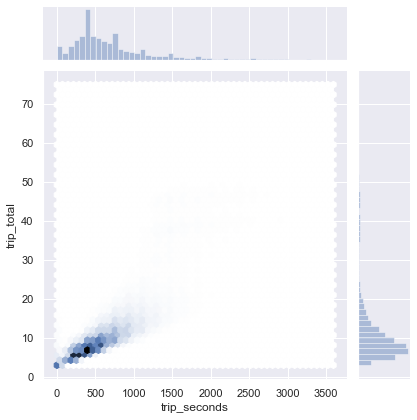

In [19]:
# create a hexagonal binned heat map of trip_seconds and trip_totals, only include trips of less than an hour, and trips with the total fare between $3 and $75
g = sns.jointplot(x='trip_seconds', y='trip_total', data=df[(df.trip_seconds < 3600) & (df.trip_total < 75)& (df.trip_total > 3)]  , kind='hex')
plt.show()

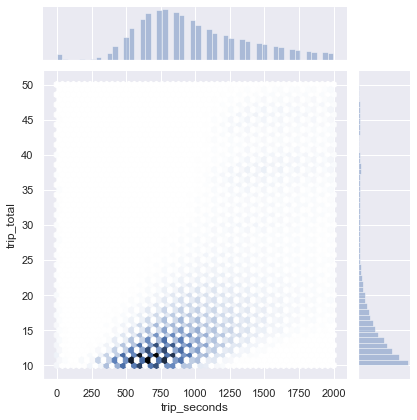

In [20]:
# Filter the data to create a more meaningful heat map
g = sns.jointplot(x='trip_seconds', y='trip_total', data=df[(df.trip_seconds < 2000) & (df.trip_total < 50)& (df.trip_total > 10)]  , kind='hex')
plt.show()

There's a positive relationship between the two variables, indicating that when the trip is long, the costs are high. The color is very dark between 500 and around 800 of trip_seconds and 10 to 15 of trip_total, which means that most travelers took trips within this range.

In [21]:
# Eliminate all rows in which trip_total is outside the range  [3.00,75.00] . Also eliminate all rows in which trip_seconds is outside the range  [58,3600] 
df = df[df['trip_total'].between(3, 75, inclusive = True)].copy()
dff = df[df['trip_seconds'].between(58, 3600, inclusive = True)].copy()
dff.shape

(1914376, 30)

## 4. Predictive Analytics -- Regression

In [23]:
# Run a regression and use trip_total as the dependent variable and use trip_seconds, trip_miles, credit, hour, month, and dayofweek as the independent variables
import statsmodels.formula.api as smf

# Create credit as dummy variable
dff['credit'] = np.where(dff['payment_type'] == 'Credit Card', 1 , 0).copy()
dff.head(5)

,company,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,extras,fare,payment_type,pickup_census_tract,...,trip_start_timestamp,trip_total,trip_start,trip_end,year,month,day,hour,day_of_the_week,credit
1,Taxi Affiliation Services,1.703132e+10,41.884987,"{'type': 'Point', 'coordinates': [-87.62099291...",-87.620993,32.0,1.0,5.85,Cash,1.703184e+10,...,2013-10-09T22:30:00.000,6.85,2013-10-09 22:30:00,2013-10-09 22:30:00,2013,10,9,22,2,0
2,NaN,NaN,41.922761,"{'type': 'Point', 'coordinates': [-87.69915534...",-87.699155,22.0,0.0,7.25,Credit Card,NaN,...,2013-05-18T22:30:00.000,9.25,2013-05-18 22:30:00,2013-05-18 22:45:00,2013,5,18,22,5,1
3,Taxi Affiliation Services,1.703184e+10,41.904935,"{'type': 'Point', 'coordinates': [-87.64990722...",-87.649907,8.0,0.0,8.45,Cash,1.703128e+10,...,2015-09-14T10:15:00.000,8.45,2015-09-14 10:15:00,2015-09-14 10:30:00,2015,9,14,10,0,0
4,Taxi Affiliation Services,1.703124e+10,41.900560,"{'type': 'Point', 'coordinates': [-87.69419737...",-87.694197,24.0,0.0,7.25,Cash,1.703124e+10,...,2015-10-24T11:30:00.000,7.25,2015-10-24 11:30:00,2015-10-24 11:30:00,2015,10,24,11,5,0
5,NaN,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,1.5,9.50,Cash,1.703108e+10,...,2017-03-12T01:30:00.000,11.00,2017-03-12 01:30:00,2017-03-12 01:30:00,2017,3,12,1,6,0


In [24]:
results = smf.ols('trip_total ~ trip_seconds + trip_miles + C(credit) + hour + month + day_of_the_week',
                  data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trip_total   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.004e+06
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:28:34   Log-Likelihood:            -6.0585e+06
No. Observations:             1914376   AIC:                         1.212e+07
Df Residuals:                 1914369   BIC:                         1.212e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3359      0.016     86.120      0.000       1.305       1.366
C(credit)[T.1]      3.9945      0.009    454.475      0.000       3.977       4.012
trip_seconds        0.0158   7.27e-06   2178.625      0.000       0.016       0.016
trip_miles          0.0686      0.000    208.758      0.000       0.068       0.069
hour               -0.0676      0.001   -106.120      0.000      -0.069      -0.066
month              -0.0464      0.001    -37.968      0.000      -0.049      -0.044
day_of_the_week    -0.0006      0.002     -0.296      0.767      -0.005       0.004
==============================================================================
Omnibus:                   849193.791   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18997061.437
Skew:                           1.620   Prob(JB):                         0.00
Kurtosis:                      18.089   Cond. No.                     3.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the adjusted R squared, about 76% of the change of trip_total can be explained by these variables.
In the regression model, the significant variables are trip_seconds, trip_miles, Credit Card, hour, and month because these variables has p values that are smaller than 0.05. day_of_week is not significant because its p value is greater than 0.05. 

1. For trip_seconds, if the trip increases by 1 second, the total cost of trip will increase by 0.0158.
2. For trip_miles, if the trip increases by 1 mile, the total cost of trip will increase by 0.0686.
3. For Credit Card, if the passenger pay the total cost by credit card, they usually pay about 4 more than others pay with other methods.
4. For hour, if the trip takes place by 1 hour late, the total cost of trip will decrease by 0.0676.
5. For hour, if the trip takes place by 1 month late, the total cost of trip will decrease by 0.0464.

#### 6.0b Run the same regression as in part a, but use `tips` as your dependent variable.

In [25]:
# use tips as the dependent variable
results2 = smf.ols('tips ~ trip_seconds + trip_miles + C(credit) + hour + month + day_of_the_week',
                  data=dff).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   tips   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 5.258e+05
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:28:42   Log-Likelihood:            -3.2400e+06
No. Observations:             1914376   AIC:                         6.480e+06
Df Residuals:                 1914369   BIC:                         6.480e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7064      0.004   -198.519      0.000      -0.713      -0.699
C(credit)[T.1]      2.9225      0.002   1449.426      0.000       2.919       2.926
trip_seconds        0.0012   1.67e-06    715.748      0.000       0.001       0.001
trip_miles          0.0066   7.54e-05     87.387      0.000       0.006       0.007
hour               -0.0029      0.000    -19.829      0.000      -0.003      -0.003
month              -0.0036      0.000    -12.904      0.000      -0.004      -0.003
day_of_the_week    -0.0175      0.000    -35.262      0.000      -0.018      -0.016
==============================================================================
Omnibus:                  1429408.085   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        147649774.054
Skew:                           2.869   Prob(JB):                         0.00
Kurtosis:                      45.640   Cond. No.                     3.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the adjusted R squared, about 62.2% of the change of trip_total can be explained by these variables.
In the regression model, all of the independent vairables are significant because these variables has p values that are smaller than 0.05. 

1. For trip_seconds, if the trip increases by 1 second, the total cost of trip will increase by 0.0012.
2. For trip_miles, if the trip increases by 1 mile, the total cost of trip will increase by 0.0066.
3. For Credit Card, if the passenger pay the total cost by credit card, they usually pay about 2.9 more than others pay with other methods.
4. For hour, if the trip takes place by 1 hour late, the total cost of trip will decrease by 0.0029.
5. For hour, if the trip takes place by 1 month late, the total cost of trip will decrease by 0.0036.
5. For hour, if the trip takes place by 1 day late, the total cost of trip will decrease by 0.0175.

## 7. Conclusions

According to my analysis, there are several factors that contribute to the revenue of Yellow Cab. While payment type is a significant factor, the company should equip the cabs with credit card payment machine to increase the chance of collecting more tips. Also, there are several areas where people usually make larger amount of payments such as area 74 and 76. After performing additional analysis on the pick up area and drop off area, I found that the drop off area is similar with pick up area where the most profits are generated. Therefore, the company can send more cabs to these areas without worrying about traveling to far and increasing cost. Also, because people travel more in the daytime on weekdays and more at night on weekends, the drivers should pick a most profitable time to work either at weekday daytime or weekend night if possible. 